<a href="https://colab.research.google.com/github/SciEcon/Active_Learning/blob/main/The_Right_Tool_for_the_Job_Matching_Active_Learning_Techniques_to_Learning_Objectives.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Note: This Colab is supplementary material for the paper by the following authors (names by alphabetic order)**

Sarah Jacobson, Luyao Zhang*, and Jiasheng Zhu

*names by alphabetic order, * corresponding author*




# Install and Import Packages

In [45]:
import pandas as pd 
import numpy as np

In [46]:
!pip install h5py
!pip install typing-extensions
!pip install wheel

In [47]:
!pip install pingouin

In [48]:
!pip install scipy

In [49]:
import pingouin as pg

# Data Preparation



## import data

In [50]:
import io
df =  pd.read_csv("https://raw.githubusercontent.com/SciEcon/Active_Learning/main/data/EL1to7.csv")
df.head()

,Subject Number,Q1a. Reflection on the concept,Q1b. Game for individual decisions,Q1c. Presentation,Q1d. Peer evaluations,Q1e. Debate for Pro & Con,Q1f. Lecture,Q1g. Simulate economic cases using python,Q1h. Doing quizzes/exams,Q1i. Solving problem sets/homework,...,"Q9. Which course activities did you find most useful in developing your Signature Work? Rank by ordering the items in the box below, with the most useful one at the top. - Ranks - Drag items here to Rank - b. Game for individual decisions - Rank","Q9. Which course activities did you find most useful in developing your Signature Work? Rank by ordering the items in the box below, with the most useful one at the top. - Ranks - Drag items here to Rank - c. Presentation - Rank","Q9. Which course activities did you find most useful in developing your Signature Work? Rank by ordering the items in the box below, with the most useful one at the top. - Ranks - Drag items here to Rank - d. Peer evaluations - Rank","Q9. Which course activities did you find most useful in developing your Signature Work? Rank by ordering the items in the box below, with the most useful one at the top. - Ranks - Drag items here to Rank - e. Debate for Pro & Con - Rank","Q9. Which course activities did you find most useful in developing your Signature Work? Rank by ordering the items in the box below, with the most useful one at the top. - Ranks - Drag items here to Rank - f. Lecture - Rank","Q9. Which course activities did you find most useful in developing your Signature Work? Rank by ordering the items in the box below, with the most useful one at the top. - Ranks - Drag items here to Rank - g. Simulate economic cases using python - Rank","Q9. Which course activities did you find most useful in developing your Signature Work? Rank by ordering the items in the box below, with the most useful one at the top. - Ranks - Drag items here to Rank - h. Doing quizzes/exams - Rank","Q9. Which course activities did you find most useful in developing your Signature Work? Rank by ordering the items in the box below, with the most useful one at the top. - Ranks - Drag items here to Rank - i. Solving problem sets/homework - Rank","Q9. Which course activities did you find most useful in developing your Signature Work? Rank by ordering the items in the box below, with the most useful one at the top. - Ranks - Drag items here to Rank - j. Group discussion during class - Rank","Q10. Following Q9, can you give an example of how these learning activities have helped you?"
0,1,Somewhat inactively,Somewhat actively,Very actively,Somewhat actively,Very actively,Somewhat inactively,Very actively,Very actively,Very actively,...,10,1,4,9,8,2,7,5,6,The presentation helps me figure out the main ...
1,2,Somewhat inactively,Somewhat inactively,Neither inactively nor actively,Extremely inactively,Somewhat inactively,Neither inactively nor actively,Somewhat actively,Very inactively,Somewhat inactively,...,9,2,10,8,1,5,7,6,3,I learned to draw Lucicharts through class pre...
2,3,Very inactively,Extremely inactively,Somewhat inactively,Very inactively,Very inactively,Very inactively,Very inactively,Extremely inactively,Extremely inactively,...,1,6,4,10,7,5,9,3,2,It helps me design the signature research ques...
3,4,Somewhat actively,Very actively,Very actively,Very actively,Somewhat actively,Somewhat actively,Somewhat actively,Very actively,Very actively,...,7,2,10,3,4,1,9,8,5,Simulate economic cases using python helps me ...
4,5,Somewhat actively,Somewhat actively,Very actively,Extremely actively,Somewhat actively,Somewhat actively,Very actively,Very actively,Very actively,...,3,4,9,8,5,6,7,10,1,My peers have different opinions with me. We d...


## process data

In [51]:
'''
Replace responses with numerical numbers for data processing and economic and statistical analysis
'''

df_dummy = df.replace(to_replace =['Extremely actively','Very actively','Somewhat actively',
                             'Neither inactively nor actively','Somewhat inactively','Very inactively',
                            'Extremely inactively'],value =[3,2,1,0,-1,-2,-3])
df_dummy = df_dummy.replace(to_replace =['Extremely effective','Very effective','Somewhat effective',
                             'Neither ineffective nor effective','Somewhat ineffective','Very ineffective',
                             'Extremely ineffective'],value =[3,2,1,0,-1,-2,-3])
df_dummy.head()

,Subject Number,Q1a. Reflection on the concept,Q1b. Game for individual decisions,Q1c. Presentation,Q1d. Peer evaluations,Q1e. Debate for Pro & Con,Q1f. Lecture,Q1g. Simulate economic cases using python,Q1h. Doing quizzes/exams,Q1i. Solving problem sets/homework,...,"Q9. Which course activities did you find most useful in developing your Signature Work? Rank by ordering the items in the box below, with the most useful one at the top. - Ranks - Drag items here to Rank - b. Game for individual decisions - Rank","Q9. Which course activities did you find most useful in developing your Signature Work? Rank by ordering the items in the box below, with the most useful one at the top. - Ranks - Drag items here to Rank - c. Presentation - Rank","Q9. Which course activities did you find most useful in developing your Signature Work? Rank by ordering the items in the box below, with the most useful one at the top. - Ranks - Drag items here to Rank - d. Peer evaluations - Rank","Q9. Which course activities did you find most useful in developing your Signature Work? Rank by ordering the items in the box below, with the most useful one at the top. - Ranks - Drag items here to Rank - e. Debate for Pro & Con - Rank","Q9. Which course activities did you find most useful in developing your Signature Work? Rank by ordering the items in the box below, with the most useful one at the top. - Ranks - Drag items here to Rank - f. Lecture - Rank","Q9. Which course activities did you find most useful in developing your Signature Work? Rank by ordering the items in the box below, with the most useful one at the top. - Ranks - Drag items here to Rank - g. Simulate economic cases using python - Rank","Q9. Which course activities did you find most useful in developing your Signature Work? Rank by ordering the items in the box below, with the most useful one at the top. - Ranks - Drag items here to Rank - h. Doing quizzes/exams - Rank","Q9. Which course activities did you find most useful in developing your Signature Work? Rank by ordering the items in the box below, with the most useful one at the top. - Ranks - Drag items here to Rank - i. Solving problem sets/homework - Rank","Q9. Which course activities did you find most useful in developing your Signature Work? Rank by ordering the items in the box below, with the most useful one at the top. - Ranks - Drag items here to Rank - j. Group discussion during class - Rank","Q10. Following Q9, can you give an example of how these learning activities have helped you?"
0,1,-1,1,2,1,2,-1,2,2,2,...,10,1,4,9,8,2,7,5,6,The presentation helps me figure out the main ...
1,2,-1,-1,0,-3,-1,0,1,-2,-1,...,9,2,10,8,1,5,7,6,3,I learned to draw Lucicharts through class pre...
2,3,-2,-3,-1,-2,-2,-2,-2,-3,-3,...,1,6,4,10,7,5,9,3,2,It helps me design the signature research ques...
3,4,1,2,2,2,1,1,1,2,2,...,7,2,10,3,4,1,9,8,5,Simulate economic cases using python helps me ...
4,5,1,1,2,3,1,1,2,2,2,...,3,4,9,8,5,6,7,10,1,My peers have different opinions with me. We d...


In [52]:
'''
Replace original activity names with alphabetical letters to represent columns and facilitate analysis
'''

col = [0]
a = [1,2,3,4,5,6,7]
b = ['a','b','c','d','e','f','g','h','i','j']
for m in a:
  for n in b:
    nitem=str(m)+n
    col.append(nitem)
col=col+[8]
for n in b:
  nitem=str(8)+n
  col.append(nitem)
col=col+[9]
for n in b:
  nitem=str(9)+n
  col.append(nitem)
col=col+[10]
print(col)
df_dummy.columns=col
df_dummy.head()

[0, '1a', '1b', '1c', '1d', '1e', '1f', '1g', '1h', '1i', '1j', '2a', '2b', '2c', '2d', '2e', '2f', '2g', '2h', '2i', '2j', '3a', '3b', '3c', '3d', '3e', '3f', '3g', '3h', '3i', '3j', '4a', '4b', '4c', '4d', '4e', '4f', '4g', '4h', '4i', '4j', '5a', '5b', '5c', '5d', '5e', '5f', '5g', '5h', '5i', '5j', '6a', '6b', '6c', '6d', '6e', '6f', '6g', '6h', '6i', '6j', '7a', '7b', '7c', '7d', '7e', '7f', '7g', '7h', '7i', '7j', 8, '8a', '8b', '8c', '8d', '8e', '8f', '8g', '8h', '8i', '8j', 9, '9a', '9b', '9c', '9d', '9e', '9f', '9g', '9h', '9i', '9j', 10]


,0,1a,1b,1c,1d,1e,1f,1g,1h,1i,...,9b,9c,9d,9e,9f,9g,9h,9i,9j,10
0,1,-1,1,2,1,2,-1,2,2,2,...,10,1,4,9,8,2,7,5,6,The presentation helps me figure out the main ...
1,2,-1,-1,0,-3,-1,0,1,-2,-1,...,9,2,10,8,1,5,7,6,3,I learned to draw Lucicharts through class pre...
2,3,-2,-3,-1,-2,-2,-2,-2,-3,-3,...,1,6,4,10,7,5,9,3,2,It helps me design the signature research ques...
3,4,1,2,2,2,1,1,1,2,2,...,7,2,10,3,4,1,9,8,5,Simulate economic cases using python helps me ...
4,5,1,1,2,3,1,1,2,2,2,...,3,4,9,8,5,6,7,10,1,My peers have different opinions with me. We d...


# 1. Data Summary

In [53]:
'''
Generate a new dataframe to store summary data calculated from the raw dataframe
'''

col= ['a','b','c','d','e','f','g','h','i','j']
df_summary= pd.DataFrame(np.random.random(size=(7,10)), columns=col)
df_summary.index=[1,2,3,4,5,6,7]
df_summary

,a,b,c,d,e,f,g,h,i,j
1,0.876718,0.669198,0.011709,0.167095,0.392762,0.258073,0.303346,0.466247,0.924837,0.544124
2,0.550056,0.885330,0.312822,0.332227,0.890206,0.805403,0.919380,0.489598,0.826452,0.340533
3,0.569539,0.640542,0.595095,0.931534,0.609829,0.565305,0.057893,0.059796,0.475538,0.175719
4,0.855299,0.926809,0.079799,0.837269,0.527335,0.156336,0.352267,0.175297,0.651771,0.304575
5,0.262073,0.404677,0.502279,0.691614,0.501312,0.968595,0.371230,0.950012,0.419626,0.767726
6,0.240282,0.477380,0.952412,0.518700,0.965983,0.423851,0.624146,0.360638,0.958788,0.193540
7,0.007751,0.740124,0.555279,0.536189,0.002774,0.304506,0.214221,0.002041,0.929614,0.075147


In [54]:
'''
Insert the means of perceived engagement/effectiveness to the new dataframe accordingly
'''

for qNumber in [1,2,3,4,5,6,7]:
  for actNumber in ['a','b','c','d','e','f','g','h','i','j']:
    item = str(qNumber)+actNumber
    df_summary[actNumber][qNumber] = df_dummy[item].mean()
df_summary

,a,b,c,d,e,f,g,h,i,j
1,0.678571,1.071429,1.000000,1.250000,1.142857,0.964286,1.250000,1.392857,1.321429,1.250000
2,0.321429,0.250000,0.750000,0.035714,0.642857,0.750000,0.642857,0.785714,0.750000,0.464286
3,0.785714,0.535714,0.857143,0.178571,0.750000,0.642857,0.642857,0.821429,0.678571,0.571429
4,0.750000,0.750000,0.928571,0.250000,0.607143,0.571429,0.714286,0.535714,0.428571,0.642857
5,0.250000,0.500000,0.464286,0.464286,0.750000,0.428571,0.428571,0.285714,0.464286,0.892857
6,0.607143,0.535714,1.000000,0.142857,0.642857,0.857143,0.892857,0.500000,0.607143,0.678571
7,0.750000,0.535714,0.714286,0.178571,1.142857,0.892857,0.464286,0.571429,0.857143,0.642857


In [55]:
'''
Adjust the order of activities
'''

df_summary = df_summary[['f','i','h','a','c','j','e','d','g','b']]
df_summary

,f,i,h,a,c,j,e,d,g,b
1,0.964286,1.321429,1.392857,0.678571,1.000000,1.250000,1.142857,1.250000,1.250000,1.071429
2,0.750000,0.750000,0.785714,0.321429,0.750000,0.464286,0.642857,0.035714,0.642857,0.250000
3,0.642857,0.678571,0.821429,0.785714,0.857143,0.571429,0.750000,0.178571,0.642857,0.535714
4,0.571429,0.428571,0.535714,0.750000,0.928571,0.642857,0.607143,0.250000,0.714286,0.750000
5,0.428571,0.464286,0.285714,0.250000,0.464286,0.892857,0.750000,0.464286,0.428571,0.500000
6,0.857143,0.607143,0.500000,0.607143,1.000000,0.678571,0.642857,0.142857,0.892857,0.535714
7,0.892857,0.857143,0.571429,0.750000,0.714286,0.642857,1.142857,0.178571,0.464286,0.535714


In [56]:
'''
Replace the row numbers with learning objectives' names and transform the rows and columns
'''

df_summary.index=['Actively engage','Remember concepts','Understand perspectives','Analyze real-world issues',
     'Collaborative learning','Conduct research','Pros & cons of monetary policy']
df_summary = df_summary.T

In [57]:
'''
Replace the column letters with learning techniques' names
'''

df_summary.index=['Lecture','Problem sets','Quizzes/exams','Written reflection','Research idea presentation','Small group discussion','Debate','Peer advice',
      'Python simulation','Game']
df_summary = df_summary.round(2)


df_summary=df_summary.reindex(columns=['Actively engage','Remember concepts','Understand perspectives','Analyze real-world issues',
     'Collaborative learning','Pros & cons of monetary policy','Conduct research'])

df_summary

,Actively engage,Remember concepts,Understand perspectives,Analyze real-world issues,Collaborative learning,Pros & cons of monetary policy,Conduct research
Lecture,0.96,0.75,0.64,0.57,0.43,0.89,0.86
Problem sets,1.32,0.75,0.68,0.43,0.46,0.86,0.61
Quizzes/exams,1.39,0.79,0.82,0.54,0.29,0.57,0.50
Written reflection,0.68,0.32,0.79,0.75,0.25,0.75,0.61
Research idea presentation,1.00,0.75,0.86,0.93,0.46,0.71,1.00
Small group discussion,1.25,0.46,0.57,0.64,0.89,0.64,0.68
Debate,1.14,0.64,0.75,0.61,0.75,1.14,0.64
Peer advice,1.25,0.04,0.18,0.25,0.46,0.18,0.14
Python simulation,1.25,0.64,0.64,0.71,0.43,0.46,0.89
Game,1.07,0.25,0.54,0.75,0.50,0.54,0.54


[Text(0.5, 0, 'Actively engage'),
 Text(1.5, 0, 'Remember concepts'),
 Text(2.5, 0, 'Understand perspectives'),
 Text(3.5, 0, 'Analyze real-world issues'),
 Text(4.5, 0, 'Collaborative learning'),
 Text(5.5, 0, 'Pros & cons of monetary policy'),
 Text(6.5, 0, 'Conduct research')]

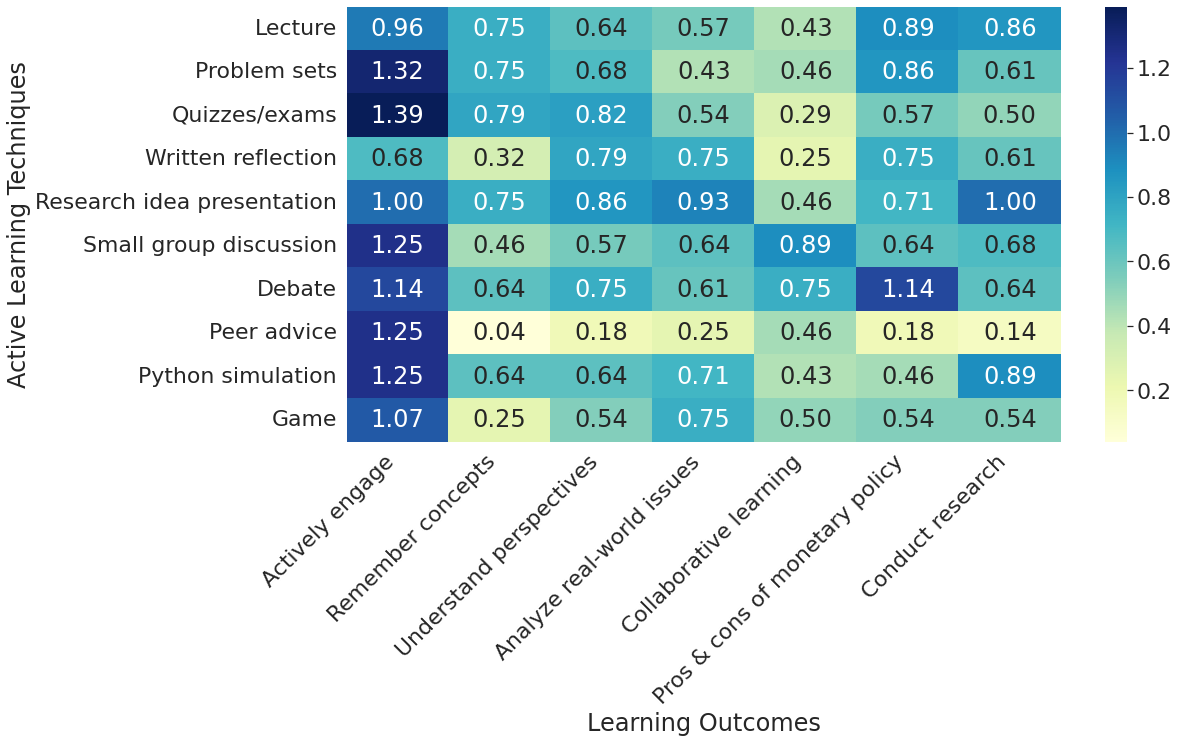

In [58]:
'''
Plot the summary data (means of effective learning perceptions) for Questions 1-7 in heatmap
'''

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
sns.set(font_scale=2)
heatmap=sns.heatmap(df_summary,annot=True, cmap='YlGnBu',fmt='.2f')
heatmap.set_xlabel('Learning Outcomes')
heatmap.set_ylabel('Active Learning Techniques')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')

In [59]:
'''
Generate a new dataframe to store standard deviations for each learning technique toward each learning objective from the raw dataframe
'''

col= ['a','b','c','d','e','f','g','h','i','j']
df_std= pd.DataFrame(np.random.random(size=(7,10)), columns=col)
df_std.index=[1,2,3,4,5,6,7]

In [60]:
'''
Insert the standard deviations of perceived engagement/effectiveness to the new dataframe accordingly
'''

for qNumber in [1,2,3,4,5,6,7]:
  for actNumber in ['a','b','c','d','e','f','g','h','i','j']:
    item = str(qNumber)+actNumber
    df_std[actNumber][qNumber] = df_dummy[item].std()
df_std = df_std.round(2)
df_std

,a,b,c,d,e,f,g,h,i,j
1,1.44,1.59,1.28,1.73,1.46,1.35,1.69,1.62,1.72,1.62
2,1.83,1.78,1.73,2.01,1.97,1.78,1.89,1.89,1.94,1.99
3,1.73,1.82,1.78,2.00,1.92,1.70,1.89,1.81,1.94,2.01
4,1.80,1.96,1.86,1.92,1.91,1.83,1.88,1.91,2.03,1.97
5,1.97,1.93,1.88,2.19,1.92,1.85,1.85,1.92,1.90,1.91
6,1.93,1.99,1.85,2.10,1.99,1.94,2.13,2.03,2.06,1.98
7,1.96,2.05,1.98,2.09,1.98,1.87,1.99,2.01,1.84,2.00


In [61]:
'''
Adjust the order of activities
'''

df_std = df_std[['f','i','h','a','c','j','e','d','g','b']]

In [62]:
'''
Replace the row numbers with learning objectives' names, 
replace the column letters with learning technique' names, 
and transform the rows and columns
'''

df_std.columns=['Lecture','Problem sets','Quizzes/exams','Written reflection','Research idea presentation','Small group discussion','Debate','Peer advice',
      'Python simulation','Game']
df_std.index=['actively engage','remember concepts','understand perspectives','analyze real-world issue',
     'collaborative learning','conduct research','pros & cons about monetary policy']
df_std = df_std.T

In [63]:
df_std

,actively engage,remember concepts,understand perspectives,analyze real-world issue,collaborative learning,conduct research,pros & cons about monetary policy
Lecture,1.35,1.78,1.70,1.83,1.85,1.94,1.87
Problem sets,1.72,1.94,1.94,2.03,1.90,2.06,1.84
Quizzes/exams,1.62,1.89,1.81,1.91,1.92,2.03,2.01
Written reflection,1.44,1.83,1.73,1.80,1.97,1.93,1.96
Research idea presentation,1.28,1.73,1.78,1.86,1.88,1.85,1.98
Small group discussion,1.62,1.99,2.01,1.97,1.91,1.98,2.00
Debate,1.46,1.97,1.92,1.91,1.92,1.99,1.98
Peer advice,1.73,2.01,2.00,1.92,2.19,2.10,2.09
Python simulation,1.69,1.89,1.89,1.88,1.85,2.13,1.99
Game,1.59,1.78,1.82,1.96,1.93,1.99,2.05


Text(200.49999999999997, 0.5, 'Active Learning Techniques')

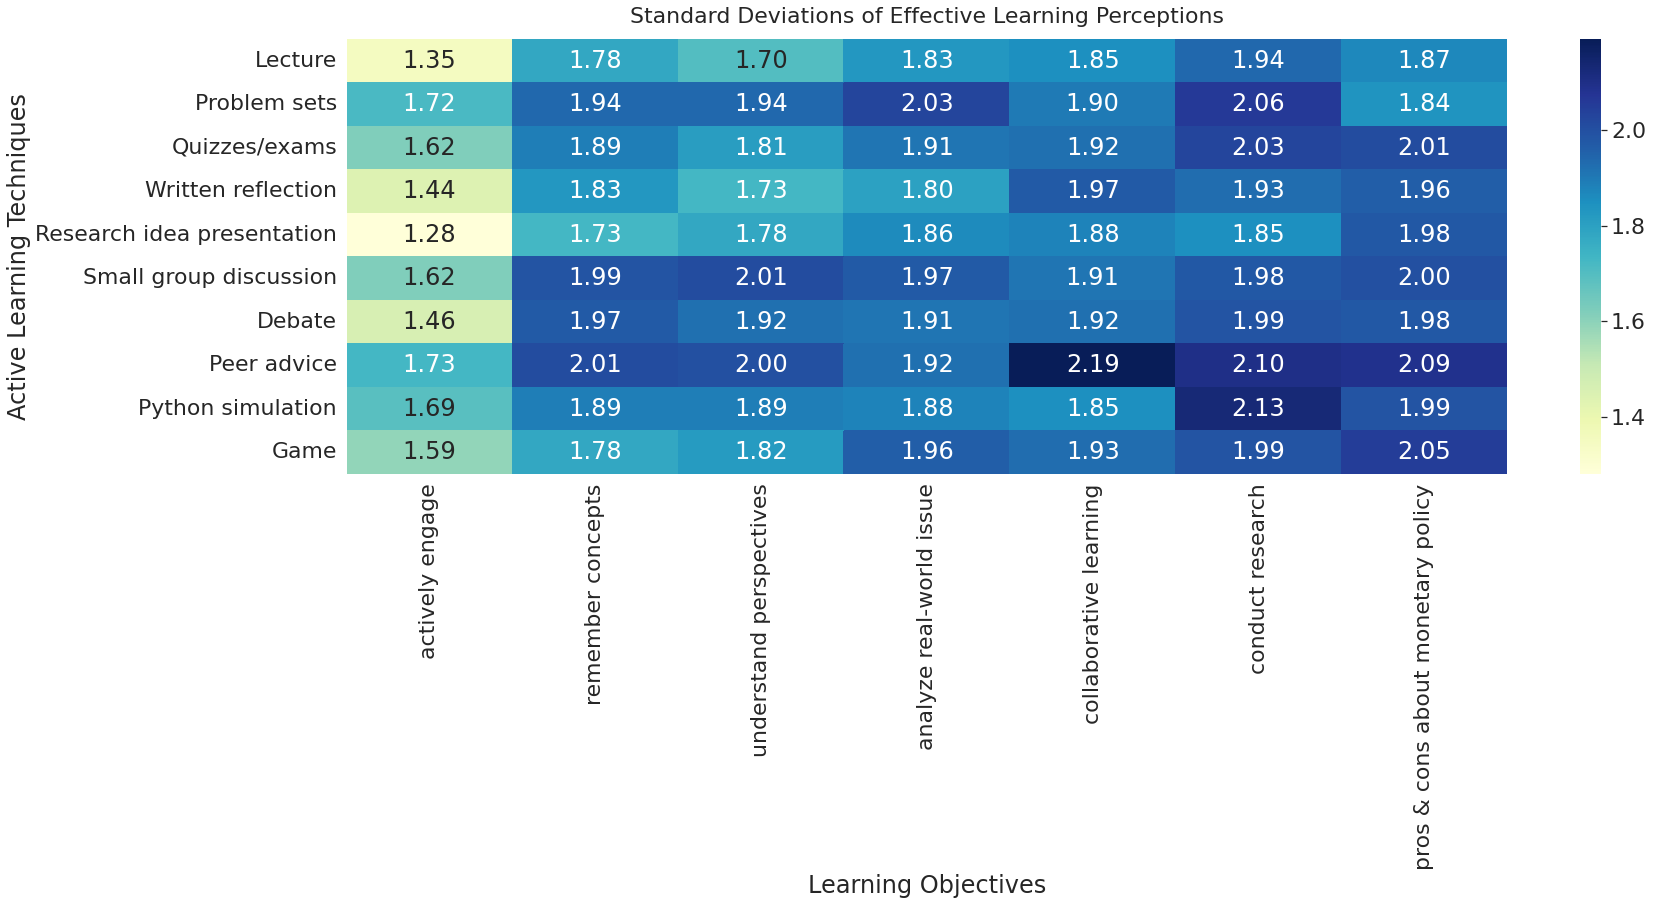

In [64]:
'''
Plot the summary data (standard deviations of effective learning perceptions) for Questions 1-7 in heatmap
'''

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(26, 8))
heatmap=sns.heatmap(df_std,annot=True, cmap='YlGnBu',fmt='.2f')
heatmap.set_title('Standard Deviations of Effective Learning Perceptions', fontdict={'fontsize':22}, pad=16)
heatmap.set_xlabel('Learning Objectives')
heatmap.set_ylabel('Active Learning Techniques')

#2. Spearman Correlation (Engagement, Enjoyment, and to what extent they can explain for answers to Q2-Q7)

In [65]:
df8 =  pd.read_csv('https://raw.githubusercontent.com/SciEcon/Active_Learning/main/data/EL8.csv')
df8.head()

,Subject Number,a. Reflection on the concept - Rank,b. Game for individual decisions - Rank,c. Presentation - Rank,d. Peer evaluations - Rank,e. Debate for Pro & Con - Rank,f. Lecture - Rank,g. Simulate economic cases using python - Rank,h. Doing quizzes/exams - Rank,i. Solving problem sets/homework - Rank,j. Group discussion during class - Rank
0,1,7,2,4,10,9,6,1,5,3,8
1,2,9,2,3,10,8,4,6,5,7,1
2,3,3,1,4,9,6,7,2,5,10,8
3,4,7,5,6,10,3,2,4,9,8,1
4,5,4,3,2,10,9,8,5,6,7,1


In [66]:
'''
Replace the original names of leaning techniques with alphabetical letters to facilitate analysis
'''

df8=df8.rename(columns={"a. Reflection on the concept - Rank": "a", "b. Game for individual decisions - Rank": "b","c. Presentation - Rank": "c",'d. Peer evaluations - Rank':'d','e. Debate for Pro & Con - Rank':'e','f. Lecture - Rank':'f','g. Simulate economic cases using python - Rank':'g','h. Doing quizzes/exams - Rank':'h','i. Solving problem sets/homework - Rank':'i','j. Group discussion during class - Rank':'j'})
df8.head()

,Subject Number,a,b,c,d,e,f,g,h,i,j
0,1,7,2,4,10,9,6,1,5,3,8
1,2,9,2,3,10,8,4,6,5,7,1
2,3,3,1,4,9,6,7,2,5,10,8
3,4,7,5,6,10,3,2,4,9,8,1
4,5,4,3,2,10,9,8,5,6,7,1


In [67]:
'''
Reverse the rank (replace ranking number with (10 - ranking number)) to facilitate analysis
'''

for i in ['a','b','c','d','e','f','g','h','i','j']:
  for j in range(28):
    df8[i][j]=11-df8[i][j]
df8.head()

,Subject Number,a,b,c,d,e,f,g,h,i,j
0,1,4,9,7,1,2,5,10,6,8,3
1,2,2,9,8,1,3,7,5,6,4,10
2,3,8,10,7,2,5,4,9,6,1,3
3,4,4,6,5,1,8,9,7,2,3,10
4,5,7,8,9,1,2,3,6,5,4,10


In [68]:
'''
Spearman correlations between engagement and enjoyment
'''

Activities = ['a','b','c','d','e','f','g','h','i','j']
for j in Activities:
    print(pg.corr(df_dummy['1'+j], df8[j], method="spearman").round(5),j)

           n        r         CI95%    p-val    power
spearman  28  0.28224  [-0.1, 0.59]  0.14563  0.31307 a
           n        r          CI95%    p-val    power
spearman  28  0.20285  [-0.18, 0.54]  0.30056  0.18077 b
           n        r         CI95%    p-val    power
spearman  28  0.38688  [0.02, 0.66]  0.04197  0.54454 c
           n       r          CI95%    p-val    power
spearman  28  0.3559  [-0.02, 0.64]  0.06306  0.47185 d
           n        r         CI95%    p-val    power
spearman  28  0.15584  [-0.23, 0.5]  0.42843  0.12493 e
           n        r          CI95%    p-val    power
spearman  28  0.02202  [-0.35, 0.39]  0.91142  0.05089 f
           n        r          CI95%    p-val    power
spearman  28  0.11382  [-0.27, 0.47]  0.56413  0.08884 g
           n        r          CI95%    p-val    power
spearman  28 -0.16343  [-0.51, 0.22]  0.40598  0.13282 h
           n        r          CI95%    p-val    power
spearman  28  0.11766  [-0.27, 0.47]  0.55099  0.09162 i


In [69]:
'''
Spearman correlations between enjoyment and effectiveness in various learning objectives
'''

#To what extent can enjoyment explain answers to Q2-Q7
Activities = ['a','b','c','d','e','f','g','h','i','j']
for i in [2,3,4,5,6,7]:
  for j in Activities:
      print(pg.corr(df_dummy[str(i)+j], df8[j], method="spearman").round(5),str(i),j)

           n        r          CI95%    p-val   power
spearman  28  0.01079  [-0.36, 0.38]  0.95655  0.0498 2 a
           n        r          CI95%    p-val    power
spearman  28  0.14274  [-0.24, 0.49]  0.46871  0.11232 2 b
           n        r          CI95%    p-val    power
spearman  28  0.12131  [-0.26, 0.47]  0.53859  0.09436 2 c
           n        r         CI95%    p-val    power
spearman  28  0.52724  [0.19, 0.75]  0.00394  0.84512 2 d
           n        r          CI95%   p-val    power
spearman  28  0.35522  [-0.02, 0.64]  0.0636  0.47028 2 e
           n        r          CI95%   p-val    power
spearman  28  0.22606  [-0.16, 0.55]  0.2474  0.21458 2 f
           n        r          CI95%    p-val    power
spearman  28  0.09323  [-0.29, 0.45]  0.63703  0.07563 2 g
           n        r          CI95%    p-val   power
spearman  28 -0.32781  [-0.62, 0.05]  0.08858  0.4082 2 h
           n       r          CI95%    p-val    power
spearman  28  0.1963  [-0.19, 0.53]  0.31675

In [70]:
df_dummy.head()

,0,1a,1b,1c,1d,1e,1f,1g,1h,1i,...,9b,9c,9d,9e,9f,9g,9h,9i,9j,10
0,1,-1,1,2,1,2,-1,2,2,2,...,10,1,4,9,8,2,7,5,6,The presentation helps me figure out the main ...
1,2,-1,-1,0,-3,-1,0,1,-2,-1,...,9,2,10,8,1,5,7,6,3,I learned to draw Lucicharts through class pre...
2,3,-2,-3,-1,-2,-2,-2,-2,-3,-3,...,1,6,4,10,7,5,9,3,2,It helps me design the signature research ques...
3,4,1,2,2,2,1,1,1,2,2,...,7,2,10,3,4,1,9,8,5,Simulate economic cases using python helps me ...
4,5,1,1,2,3,1,1,2,2,2,...,3,4,9,8,5,6,7,10,1,My peers have different opinions with me. We d...


In [71]:
'''
Spearman correlations between engagement and effectiveness in various learning objectives
'''

#To what extent can engagement explain answers to Q2-Q7
Activities = ['a','b','c','d','e','f','g','h','i','j']
for i in [2,3,4,5,6,7]:
  for j in Activities:
      print(pg.corr(df_dummy[str(i)+j], df_dummy[str(1)+j], method="spearman").round(5),str(i),j)

           n        r         CI95%    p-val    power
spearman  28  0.65148  [0.37, 0.82]  0.00017  0.97643 2 a
           n        r       CI95%  p-val    power
spearman  28  0.79642  [0.6, 0.9]    0.0  0.99981 2 b
           n        r        CI95%    p-val    power
spearman  28  0.61582  [0.32, 0.8]  0.00049  0.95387 2 c
           n        r         CI95%    p-val    power
spearman  28  0.56894  [0.25, 0.78]  0.00158  0.90621 2 d
           n        r         CI95%    p-val    power
spearman  28  0.71811  [0.47, 0.86]  0.00002  0.99561 2 e
           n        r         CI95%    p-val    power
spearman  28  0.62803  [0.33, 0.81]  0.00035  0.96281 2 f
           n        r         CI95%  p-val    power
spearman  28  0.75148  [0.53, 0.88]    0.0  0.99859 2 g
           n        r         CI95%    p-val    power
spearman  28  0.63235  [0.34, 0.81]  0.00031  0.96566 2 h
           n        r         CI95%    p-val    power
spearman  28  0.68134  [0.41, 0.84]  0.00007  0.98798 2 i
      

#3. Hypothesis Testing (Compare the Effectiveness of different techniques toward various learning objectives, Q2-Q7)

In [72]:
'''
Hypothesis Testing: Which learning technique is more effective in a pair for each learning objective?
'''

Activities = ['a','b','c','d','e','f','g','h','i','j']
for i in [1,2,3,4,5,6,7]:
  for j in Activities:
    for k in Activities:
      if k != j:
        print(pg.wilcoxon(df_dummy[str(i)+j], df_dummy[str(i)+k], alternative='less').round(5),str(i),j,k)
      else:
        print()


          W-val alternative    p-val  RBC     CLES
Wilcoxon   24.0        less  0.01714 -0.6  0.59247 1 a b
          W-val alternative    p-val      RBC     CLES
Wilcoxon   68.0        less  0.13559 -0.28421  0.56952 1 a c
          W-val alternative    p-val    RBC     CLES
Wilcoxon   16.5        less  0.00596 -0.725  0.63584 1 a d
          W-val alternative    p-val      RBC     CLES
Wilcoxon   12.0        less  0.01661 -0.69231  0.60842 1 a e
          W-val alternative    p-val      RBC     CLES
Wilcoxon   18.0        less  0.03884 -0.53846  0.56059 1 a f
          W-val alternative    p-val   RBC     CLES
Wilcoxon   15.0        less  0.00463 -0.75  0.63265 1 a g
          W-val alternative    p-val      RBC     CLES
Wilcoxon   18.0        less  0.00227 -0.76471  0.66327 1 a h
          W-val alternative    p-val      RBC     CLES
Wilcoxon   18.0        less  0.00224 -0.76471  0.64413 1 a i
          W-val alternative   p-val      RBC     CLES
Wilcoxon   12.0        less  0.0051

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.



          W-val alternative    p-val      RBC     CLES
Wilcoxon   31.0        less  0.27115 -0.20513  0.54401 1 e d

          W-val alternative    p-val      RBC     CLES
Wilcoxon   25.5        less  0.87932  0.41667  0.44515 1 e f
          W-val alternative    p-val      RBC     CLES
Wilcoxon   39.5        less  0.34817 -0.13187  0.54719 1 e g
          W-val alternative    p-val      RBC     CLES
Wilcoxon   23.5        less  0.11149 -0.39744  0.56696 1 e h
          W-val alternative   p-val   RBC     CLES
Wilcoxon   51.0        less  0.1892 -0.25  0.56122 1 e i
          W-val alternative    p-val      RBC    CLES
Wilcoxon   26.5        less  0.29262 -0.19697  0.5338 1 e j
          W-val alternative    p-val      RBC     CLES
Wilcoxon   60.0        less  0.96787  0.53846  0.43941 1 f a
          W-val alternative    p-val    RBC     CLES
Wilcoxon   49.5        less  0.27789 -0.175  0.53954 1 f b
          W-val alternative   p-val  RBC     CLES
Wilcoxon   68.0        less  0.5105

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.



          W-val alternative    p-val      RBC     CLES
Wilcoxon   34.5        less  0.78653  0.25455  0.48214 1 h d
          W-val alternative    p-val      RBC     CLES
Wilcoxon   54.5        less  0.90318  0.39744  0.43304 1 h e
          W-val alternative    p-val      RBC     CLES
Wilcoxon   54.5        less  0.97703  0.65152  0.38074 1 h f
          W-val alternative    p-val      RBC     CLES
Wilcoxon   54.0        less  0.74352  0.18681  0.48597 1 h g

          W-val alternative    p-val      RBC     CLES
Wilcoxon   20.0        less  0.64687  0.11111  0.49872 1 h i
          W-val alternative    p-val      RBC     CLES
Wilcoxon   46.0        less  0.72868  0.17949  0.47003 1 h j
          W-val alternative    p-val      RBC     CLES
Wilcoxon  135.0        less  0.99809  0.76471  0.35587 1 i a
          W-val alternative    p-val      RBC     CLES
Wilcoxon   64.5        less  0.92224  0.41758  0.43367 1 i b
          W-val alternative    p-val      RBC     CLES
Wilcoxon   99.0 

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.



          W-val alternative    p-val      RBC     CLES
Wilcoxon   54.0        less  0.75048  0.18681  0.48916 2 a b
          W-val alternative    p-val    RBC     CLES
Wilcoxon   42.5        less  0.08955 -0.375  0.57079 2 a c
          W-val alternative    p-val      RBC     CLES
Wilcoxon   58.0        less  0.94589  0.48718  0.46173 2 a d
          W-val alternative    p-val  RBC     CLES
Wilcoxon   16.5        less  0.07425 -0.5  0.55867 2 a e
          W-val alternative    p-val      RBC     CLES
Wilcoxon    4.0        less  0.00742 -0.85455  0.57143 2 a f
          W-val alternative    p-val      RBC     CLES
Wilcoxon   32.5        less  0.05147 -0.45833  0.55357 2 a g
          W-val alternative    p-val      RBC     CLES
Wilcoxon   12.0        less  0.01661 -0.69231  0.58227 2 a h
          W-val alternative    p-val      RBC     CLES
Wilcoxon   10.0        less  0.00945 -0.74359  0.57462 2 a i
          W-val alternative    p-val      RBC     CLES
Wilcoxon   27.5        less  

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.



          W-val alternative    p-val      RBC     CLES
Wilcoxon   29.0        less  0.06989 -0.44762  0.56633 2 d j
          W-val alternative    p-val  RBC     CLES
Wilcoxon   49.5        less  0.93763  0.5  0.44133 2 e a
          W-val alternative    p-val      RBC     CLES
Wilcoxon   54.0        less  0.97474  0.63636  0.42219 2 e b
          W-val alternative    p-val      RBC     CLES
Wilcoxon   49.5        less  0.43624 -0.05714  0.49809 2 e c
          W-val alternative    p-val      RBC    CLES
Wilcoxon   81.0        less  0.99563  0.78022  0.4088 2 e d

          W-val alternative    p-val      RBC    CLES
Wilcoxon   18.5        less  0.33374 -0.17778  0.5051 2 e f
          W-val alternative    p-val      RBC     CLES
Wilcoxon   38.0        less  0.48398 -0.02564  0.49681 2 e g
          W-val alternative    p-val      RBC     CLES
Wilcoxon   14.5        less  0.33626 -0.19444  0.51467 2 e h
          W-val alternative    p-val      RBC     CLES
Wilcoxon   15.5        less 

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155:

 g j
          W-val alternative    p-val      RBC     CLES
Wilcoxon   66.0        less  0.98644  0.69231  0.41773 2 h a
          W-val alternative    p-val      RBC     CLES
Wilcoxon   66.0        less  0.98594  0.69231  0.39732 2 h b
          W-val alternative    p-val      RBC     CLES
Wilcoxon   28.0        less  0.77293  0.24444  0.47768 2 h c
          W-val alternative    p-val      RBC     CLES
Wilcoxon  119.5        less  0.99719  0.75735  0.38967 2 h d
          W-val alternative    p-val      RBC     CLES
Wilcoxon   21.5        less  0.71348  0.19444  0.48533 2 h e
          W-val alternative    p-val      RBC     CLES
Wilcoxon   29.5        less  0.60221  0.07273  0.48661 2 h f
          W-val alternative    p-val      RBC     CLES
Wilcoxon   31.5        less  0.68007  0.14545  0.47895 2 h g

          W-val alternative    p-val      RBC     CLES
Wilcoxon   12.0        less  0.66598  0.14286  0.49809 2 h i
          W-val alternative    p-val      RBC     CLES
Wilcoxon   

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155:

b
          W-val alternative    p-val      RBC     CLES
Wilcoxon   42.0        less  0.41369 -0.07692  0.52105 3 a c
          W-val alternative    p-val      RBC     CLES
Wilcoxon   80.5        less  0.99411  0.76923  0.41901 3 a d
          W-val alternative    p-val      RBC     CLES
Wilcoxon   20.5        less  0.66549  0.13889  0.50765 3 a e
          W-val alternative    p-val  RBC     CLES
Wilcoxon   27.0        less  0.93225  0.5  0.46237 3 a f
          W-val alternative    p-val      RBC     CLES
Wilcoxon   23.5        less  0.80584  0.30556  0.49107 3 a g
          W-val alternative    p-val  RBC     CLES
Wilcoxon   18.0        less  0.52865  0.0  0.51148 3 a h
          W-val alternative    p-val      RBC     CLES
Wilcoxon   13.5        less  0.77482  0.28571  0.49235 3 a i
          W-val alternative    p-val      RBC     CLES
Wilcoxon   60.0        less  0.86065  0.31868  0.47895 3 a j
          W-val alternative    p-val      RBC     CLES
Wilcoxon   12.0        less  0.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155:

          W-val alternative    p-val      RBC     CLES
Wilcoxon   61.5        less  0.73623  0.17143  0.47832 3 g b
          W-val alternative    p-val      RBC     CLES
Wilcoxon   38.0        less  0.30904 -0.16484  0.52551 3 g c
          W-val alternative    p-val      RBC     CLES
Wilcoxon   58.0        less  0.99023  0.75758  0.43495 3 g d
          W-val alternative   p-val      RBC     CLES
Wilcoxon   20.0        less  0.2187 -0.27273  0.51148 3 g e
          W-val alternative  p-val      RBC     CLES
Wilcoxon   38.5        less    0.5 -0.01282  0.48406 3 g f

          W-val alternative    p-val      RBC     CLES
Wilcoxon   27.0        less  0.30479 -0.18182  0.51786 3 g h
          W-val alternative    p-val      RBC     CLES
Wilcoxon   19.5        less  0.38045 -0.13333  0.49872 3 g i
          W-val alternative   p-val      RBC     CLES
Wilcoxon   45.5        less  0.7179  0.16667  0.49043 3 g j
          W-val alternative    p-val  RBC     CLES
Wilcoxon   18.0        less 

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155:

          W-val alternative  p-val      RBC     CLES
Wilcoxon   31.0        less  0.156 -0.31868  0.52105 3 j a
          W-val alternative    p-val      RBC     CLES
Wilcoxon   40.5        less  0.56343  0.03846  0.48661 3 j b
          W-val alternative    p-val      RBC     CLES
Wilcoxon   32.5        less  0.18688 -0.28571  0.53444 3 j c
          W-val alternative    p-val     RBC    CLES
Wilcoxon   56.0        less  0.92008  0.4359  0.4426 3 j d
          W-val alternative    p-val      RBC     CLES
Wilcoxon    8.0        less  0.08599 -0.55556  0.52487 3 j e
          W-val alternative    p-val      RBC    CLES
Wilcoxon   35.5        less  0.40241 -0.08974  0.4949 3 j f
          W-val alternative    p-val      RBC     CLES
Wilcoxon   32.5        less  0.31057 -0.16667  0.50957 3 j g
          W-val alternative   p-val      RBC     CLES
Wilcoxon   22.0        less  0.1684 -0.33333  0.52997 3 j h
          W-val alternative    p-val      RBC     CLES
Wilcoxon   18.0        less  

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.



          W-val alternative    p-val      RBC     CLES
Wilcoxon   28.0        less  0.76616  0.24444  0.45217 4 c a
          W-val alternative    p-val      RBC     CLES
Wilcoxon   27.5        less  0.74939  0.22222  0.47895 4 c b

          W-val alternative    p-val      RBC     CLES
Wilcoxon   68.5        less  0.99139  0.75641  0.38457 4 c d
          W-val alternative    p-val      RBC     CLES
Wilcoxon   57.5        less  0.93506  0.47436  0.44898 4 c e
          W-val alternative    p-val      RBC     CLES
Wilcoxon   60.5        less  0.96175  0.55128  0.43367 4 c f
          W-val alternative    p-val   RBC     CLES
Wilcoxon   81.0        less  0.90311  0.35  0.46747 4 c g
          W-val alternative   p-val      RBC     CLES
Wilcoxon   46.0        less  0.9759  0.67273  0.43367 4 c h
          W-val alternative    p-val      RBC     CLES
Wilcoxon   87.0        less  0.98796  0.65714  0.43112 4 c i
          W-val alternative    p-val  RBC     CLES
Wilcoxon   38.5        less 

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155:

          W-val alternative    p-val      RBC     CLES
Wilcoxon   65.5        less  0.93178  0.43956  0.45026 4 f d
          W-val alternative    p-val      RBC     CLES
Wilcoxon   12.5        less  0.43025 -0.10714  0.51339 4 f e

          W-val alternative    p-val      RBC     CLES
Wilcoxon   30.0        less  0.23222 -0.23077  0.52934 4 f g
          W-val alternative    p-val      RBC     CLES
Wilcoxon   44.0        less  0.67787  0.12821  0.49872 4 f h
          W-val alternative    p-val      RBC    CLES
Wilcoxon   50.0        less  0.83296  0.28205  0.4898 4 f i
          W-val alternative    p-val  RBC     CLES
Wilcoxon   18.0        less  0.30391 -0.2  0.51977 4 f j
          W-val alternative    p-val      RBC     CLES
Wilcoxon   25.0        less  0.41594 -0.09091  0.49107 4 g a
          W-val alternative  p-val      RBC     CLES
Wilcoxon   38.5        less    0.5 -0.01282  0.50765 4 g b
          W-val alternative    p-val   RBC     CLES
Wilcoxon   39.0        less  0.10

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155:

          W-val alternative    p-val      RBC     CLES
Wilcoxon   16.5        less  0.03237 -0.57692  0.54592 4 i b
          W-val alternative    p-val      RBC     CLES
Wilcoxon   18.0        less  0.01422 -0.65714  0.56888 4 i c
          W-val alternative    p-val      RBC     CLES
Wilcoxon   43.0        less  0.83533  0.30303  0.46173 4 i d
          W-val alternative   p-val      RBC     CLES
Wilcoxon   10.5        less  0.1571 -0.41667  0.52041 4 i e
          W-val alternative    p-val      RBC    CLES
Wilcoxon   28.0        less  0.18891 -0.28205  0.5102 4 i f
          W-val alternative    p-val  RBC     CLES
Wilcoxon    0.0        less  0.01527 -1.0  0.54018 4 i g
          W-val alternative    p-val      RBC     CLES
Wilcoxon    6.0        less  0.18703 -0.42857  0.50574 4 i h

          W-val alternative    p-val      RBC     CLES
Wilcoxon   17.0        less  0.14491 -0.38182  0.52934 4 i j
          W-val alternative    p-val      RBC     CLES
Wilcoxon   25.5        less 

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155:

          W-val alternative    p-val   RBC     CLES
Wilcoxon   24.5        less  0.97658  0.75  0.46173 5 b a

          W-val alternative    p-val      RBC    CLES
Wilcoxon   24.5        less  0.62255  0.08889  0.4898 5 b c
          W-val alternative    p-val      RBC     CLES
Wilcoxon   18.5        less  0.55644  0.02778  0.51148 5 b d
          W-val alternative    p-val  RBC     CLES
Wilcoxon    0.0        less  0.01313 -1.0  0.54911 5 b e
          W-val alternative   p-val      RBC     CLES
Wilcoxon   25.0        less  0.6459  0.11111  0.48788 5 b f
          W-val alternative    p-val      RBC     CLES
Wilcoxon   12.0        less  0.67164  0.14286  0.48788 5 b g
          W-val alternative    p-val      RBC     CLES
Wilcoxon   33.0        less  0.91502  0.46667  0.46492 5 b h
          W-val alternative    p-val      RBC     CLES
Wilcoxon   23.0        less  0.54808  0.02222  0.49936 5 b i
          W-val alternative    p-val      RBC    CLES
Wilcoxon    1.5        less  0.0192

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155:

          W-val alternative  p-val      RBC     CLES
Wilcoxon   17.5        less    0.5 -0.02778  0.49043 5 d i
          W-val alternative    p-val  RBC     CLES
Wilcoxon    0.0        less  0.01527 -1.0  0.55612 5 d j
          W-val alternative    p-val  RBC     CLES
Wilcoxon   55.0        less  0.99849  1.0  0.41071 5 e a
          W-val alternative    p-val  RBC     CLES
Wilcoxon   21.0        less  0.99275  1.0  0.45089 5 e b
          W-val alternative   p-val      RBC     CLES
Wilcoxon   37.0        less  0.9672  0.64444  0.43112 5 e c
          W-val alternative   p-val      RBC     CLES
Wilcoxon   17.0        less  0.9311  0.61905  0.47066 5 e d

          W-val alternative    p-val      RBC     CLES
Wilcoxon   46.0        less  0.97991  0.67273  0.43176 5 e f
          W-val alternative    p-val  RBC     CLES
Wilcoxon   28.0        less  0.99561  1.0  0.43176 5 e g
          W-val alternative    p-val      RBC     CLES
Wilcoxon   51.0        less  0.99449  0.85455  0.41199 5

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155:

          W-val alternative  p-val      RBC     CLES
Wilcoxon   10.0        less    0.5 -0.04762  0.49872 5 g c
          W-val alternative    p-val      RBC     CLES
Wilcoxon   21.0        less  0.45196 -0.06667  0.52679 5 g d
          W-val alternative    p-val  RBC     CLES
Wilcoxon    0.0        less  0.00735 -1.0  0.56824 5 g e
          W-val alternative    p-val  RBC  CLES
Wilcoxon    7.5        less  0.55412  0.0   0.5 5 g f

          W-val alternative    p-val  RBC     CLES
Wilcoxon   21.0        less  0.91233  0.5  0.47513 5 g h
          W-val alternative    p-val      RBC     CLES
Wilcoxon   15.0        less  0.35714 -0.16667  0.51467 5 g i
          W-val alternative    p-val      RBC     CLES
Wilcoxon    3.0        less  0.01085 -0.86667  0.59311 5 g j
          W-val alternative   p-val      RBC    CLES
Wilcoxon   31.5        less  0.6865  0.14545  0.4949 5 h a
          W-val alternative   p-val      RBC     CLES
Wilcoxon   12.0        less  0.1061 -0.46667  0.53508 5

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155:

          W-val alternative    p-val      RBC     CLES
Wilcoxon    6.0        less  0.02639 -0.73333  0.57334 5 i j
          W-val alternative    p-val      RBC     CLES
Wilcoxon   63.0        less  0.99702  0.90909  0.38967 5 j a
          W-val alternative    p-val      RBC    CLES
Wilcoxon   26.5        less  0.98752  0.89286  0.4273 5 j b
          W-val alternative    p-val      RBC    CLES
Wilcoxon   64.0        less  0.98078  0.64103  0.4088 5 j c
          W-val alternative    p-val  RBC     CLES
Wilcoxon   21.0        less  0.99133  1.0  0.44388 5 j d
          W-val alternative    p-val  RBC     CLES
Wilcoxon   21.0        less  0.91233  0.5  0.46939 5 j e
          W-val alternative    p-val      RBC     CLES
Wilcoxon   65.0        less  0.98339  0.66667  0.40689 5 j f
          W-val alternative    p-val      RBC     CLES
Wilcoxon   42.0        less  0.99216  0.86667  0.40689 5 j g
          W-val alternative    p-val      RBC     CLES
Wilcoxon   51.5        less  0.99473 

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155:

          W-val alternative    p-val      RBC     CLES
Wilcoxon   60.0        less  0.95966  0.53846  0.43495 6 c a
          W-val alternative   p-val      RBC     CLES
Wilcoxon   41.5        less  0.9915  0.84444  0.42985 6 c b

          W-val alternative    p-val  RBC     CLES
Wilcoxon  108.0        less  0.99739  0.8  0.37883 6 c d
          W-val alternative    p-val      RBC     CLES
Wilcoxon   48.0        less  0.92494  0.45455  0.44898 6 c e
          W-val alternative    p-val      RBC     CLES
Wilcoxon   30.0        less  0.62467  0.09091  0.47959 6 c f
          W-val alternative    p-val     RBC    CLES
Wilcoxon   34.0        less  0.55541  0.0303  0.5051 6 c g
          W-val alternative    p-val      RBC     CLES
Wilcoxon   46.0        less  0.97544  0.67273  0.42857 6 c h
          W-val alternative    p-val      RBC     CLES
Wilcoxon   43.0        less  0.95123  0.56364  0.45153 6 c i
          W-val alternative    p-val     RBC     CLES
Wilcoxon   63.5        less  0.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155:

          W-val alternative    p-val  RBC     CLES
Wilcoxon   36.0        less  0.96377  0.6  0.45344 6 f a
          W-val alternative    p-val      RBC     CLES
Wilcoxon   32.5        less  0.98598  0.80556  0.44962 6 f b
          W-val alternative    p-val      RBC     CLES
Wilcoxon   25.0        less  0.41611 -0.09091  0.52041 6 f c
          W-val alternative    p-val     RBC     CLES
Wilcoxon   86.5        less  0.99856  0.9011  0.39732 6 f d
          W-val alternative    p-val      RBC     CLES
Wilcoxon   26.5        less  0.90217  0.47222  0.46747 6 f e

          W-val alternative    p-val      RBC     CLES
Wilcoxon   20.0        less  0.40139 -0.11111  0.52487 6 f g
          W-val alternative    p-val      RBC     CLES
Wilcoxon   38.0        less  0.97491  0.68889  0.44898 6 f h
          W-val alternative    p-val      RBC     CLES
Wilcoxon   29.0        less  0.95393  0.61111  0.47321 6 f i
          W-val alternative    p-val      RBC     CLES
Wilcoxon   30.5        les

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155:

          W-val alternative    p-val      RBC     CLES
Wilcoxon   69.0        less  0.99334  0.76923  0.41645 7 a d
          W-val alternative    p-val  RBC     CLES
Wilcoxon    0.0        less  0.00577 -1.0  0.57653 7 a e
          W-val alternative    p-val      RBC    CLES
Wilcoxon   12.0        less  0.20351 -0.33333  0.5236 7 a f
          W-val alternative    p-val      RBC     CLES
Wilcoxon   30.0        less  0.96385  0.66667  0.45855 7 a g
          W-val alternative    p-val      RBC     CLES
Wilcoxon   23.5        less  0.80584  0.30556  0.47385 7 a h
          W-val alternative    p-val   RBC    CLES
Wilcoxon   10.5        less  0.29387 -0.25  0.5102 7 a i
          W-val alternative    p-val      RBC    CLES
Wilcoxon   10.0        less  0.80193  0.33333  0.4898 7 a j
          W-val alternative    p-val      RBC     CLES
Wilcoxon   27.5        less  0.18594 -0.29487  0.52168 7 b a

          W-val alternative   p-val      RBC     CLES
Wilcoxon   20.0        less  0.2292 -

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155:

          W-val alternative    p-val     RBC     CLES
Wilcoxon   12.5        less  0.00596 -0.7619  0.60395 7 d f
          W-val alternative    p-val      RBC     CLES
Wilcoxon   11.0        less  0.09331 -0.51111  0.54209 7 d g
          W-val alternative    p-val      RBC     CLES
Wilcoxon    8.0        less  0.02343 -0.70909  0.55612 7 d h
          W-val alternative    p-val  RBC     CLES
Wilcoxon    0.0        less  0.00416 -1.0  0.59503 7 d i
          W-val alternative    p-val      RBC     CLES
Wilcoxon   15.5        less  0.03315 -0.60256  0.56952 7 d j
          W-val alternative    p-val  RBC     CLES
Wilcoxon   36.0        less  0.99621  1.0  0.42347 7 e a
          W-val alternative    p-val      RBC    CLES
Wilcoxon   63.0        less  0.99706  0.90909  0.4037 7 e b
          W-val alternative    p-val  RBC     CLES
Wilcoxon   55.0        less  0.99876  1.0  0.42219 7 e c
          W-val alternative    p-val     RBC     CLES
Wilcoxon  103.0        less  0.99947  0.9619  

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155:

          W-val alternative    p-val  RBC     CLES
Wilcoxon    0.0        less  0.00156 -1.0  0.61161 7 g e
          W-val alternative    p-val      RBC     CLES
Wilcoxon    8.0        less  0.01235 -0.75758  0.56441 7 g f

          W-val alternative   p-val      RBC     CLES
Wilcoxon   16.5        less  0.2461 -0.26667  0.51531 7 g h
          W-val alternative    p-val      RBC     CLES
Wilcoxon    2.0        less  0.02471 -0.85714  0.55421 7 g i
          W-val alternative    p-val      RBC     CLES
Wilcoxon   10.5        less  0.15927 -0.41667  0.52934 7 g j
          W-val alternative    p-val      RBC     CLES
Wilcoxon   12.5        less  0.23611 -0.30556  0.52615 7 h a
          W-val alternative    p-val      RBC     CLES
Wilcoxon   48.5        less  0.60372  0.06593  0.50255 7 h b
          W-val alternative    p-val   RBC     CLES
Wilcoxon   10.5        less  0.30245 -0.25  0.52296 7 h c
          W-val alternative    p-val      RBC     CLES
Wilcoxon   47.0        less  0.9

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155:

          W-val alternative    p-val      RBC    CLES
Wilcoxon    6.0        less  0.09373 -0.57143  0.5338 7 j f
          W-val alternative    p-val      RBC     CLES
Wilcoxon   25.5        less  0.87285  0.41667  0.47066 7 j g
          W-val alternative    p-val      RBC     CLES
Wilcoxon   15.5        less  0.63349  0.10714  0.48597 7 j h
          W-val alternative    p-val      RBC     CLES
Wilcoxon   14.0        less  0.16374 -0.37778  0.52296 7 j i



/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.



#4. Hypothesis Testing (Compare enjoyment among different learning techniques, Q8; Compare effectiveness in building SW project, Q9)

##Q8: Enjoyment

In [73]:
df8 = df8[['Subject Number','f','i','h','a','c','j','e','d','g','b']]
df8=df8.rename(columns={'f':'Lecture','i':'Problem sets','h':'Quizzes/exams','a':'Written reflection','c':'Research idea presentation','j':'Small group discussion','e':'Debate','d':'Peer advice','g':'Python simulation','b':'Game'})
df8.head()

,Subject Number,Lecture,Problem sets,Quizzes/exams,Written reflection,Research idea presentation,Small group discussion,Debate,Peer advice,Python simulation,Game
0,1,5,8,6,4,7,3,2,1,10,9
1,2,7,4,6,2,8,10,3,1,5,9
2,3,4,1,6,8,7,3,5,2,9,10
3,4,9,3,2,4,5,10,8,1,7,6
4,5,3,4,5,7,9,10,2,1,6,8


In [74]:
'''
Hypothesis Testing: Which learning technique is perceived to be more enjoyable in a pair?
'''

#Compare enjoyment among different learning techniques, Q8
Activities = ['Lecture','Problem sets','Quizzes/exams','Written reflection','Research idea presentation','Small group discussion','Debate','Peer advice','Python simulation','Game']
for i in Activities:
  for j in Activities:
      print(pg.mwu(df8[i], df8[j], alternative='less').round(5),i,j)

     U-val alternative    p-val  RBC  CLES
MWU  392.0        less  0.50331  0.0   0.5 Lecture Lecture
     U-val alternative    p-val      RBC     CLES
MWU  424.0        less  0.70442 -0.08163  0.45918 Lecture Problem sets
     U-val alternative    p-val      RBC     CLES
MWU  495.5        less  0.95679 -0.26403  0.36798 Lecture Quizzes/exams
     U-val alternative    p-val      RBC     CLES
MWU  424.5        less  0.70695 -0.08291  0.45855 Lecture Written reflection
     U-val alternative   p-val      RBC     CLES
MWU  401.5        less  0.5655 -0.02423  0.48788 Lecture Research idea presentation
     U-val alternative    p-val      RBC     CLES
MWU  342.0        less  0.20638  0.12755  0.56378 Lecture Small group discussion
     U-val alternative    p-val      RBC     CLES
MWU  408.5        less  0.61046 -0.04209  0.47895 Lecture Debate
     U-val alternative    p-val      RBC     CLES
MWU  595.5        less  0.99963 -0.51913  0.24043 Lecture Peer advice
     U-val alternative   p-va

In [75]:
'''
Reverse the rank (replace ranking number with (10 - ranking number)) to facilitate analysis
'''

df88=pd.melt(df8, id_vars=['Subject Number'], value_vars=['Lecture','Problem sets','Quizzes/exams','Written reflection','Research idea presentation','Small group discussion','Debate','Peer advice','Python simulation','Game'])
df88.drop('Subject Number',inplace=True, axis=1)
df88['Enjoyment']=df88['value']
df88['activities']=df88['variable']
df88

,variable,value,Enjoyment,activities
0,Lecture,5,5,Lecture
1,Lecture,7,7,Lecture
2,Lecture,4,4,Lecture
3,Lecture,9,9,Lecture
4,Lecture,3,3,Lecture
...,...,...,...,...
275,Game,8,8,Game
276,Game,6,6,Game
277,Game,3,3,Game
278,Game,10,10,Game


In [76]:
'''
boxplot for 10 learning techniques' enjoyment
'''

import plotly.express as px
fig = px.box(df88, x="activities", y="Enjoyment")
fig.show()

##Q9: Effectivness in Signature Work (SW)

In [77]:
df9 =  pd.read_csv("https://raw.githubusercontent.com/SciEcon/Active_Learning/main/data/EL9.csv")
df9.head()

,Subject Number,a. Reflection on the concept - Rank,b. Game for individual decisions - Rank,c. Presentation - Rank,d. Peer evaluations - Rank,e. Debate for Pro & Con - Rank,f. Lecture - Rank,g. Simulate economic cases using python - Rank,h. Doing quizzes/exams - Rank,i. Solving problem sets/homework - Rank,j. Group discussion during class - Rank
0,1,3,10,1,4,9,8,2,7,5,6
1,2,4,9,2,10,8,1,5,7,6,3
2,3,8,1,6,4,10,7,5,9,3,2
3,4,6,7,2,10,3,4,1,9,8,5
4,5,2,3,4,9,8,5,6,7,10,1


In [78]:
'''
Shorten learning techniques' names
'''

df9=df9.rename(columns={"a. Reflection on the concept - Rank": "Written reflection", "b. Game for individual decisions - Rank": "Game","c. Presentation - Rank": "Research idea presentation",'d. Peer evaluations - Rank':'Peer advice','e. Debate for Pro & Con - Rank':'Debate','f. Lecture - Rank':'Lecture','g. Simulate economic cases using python - Rank':'Python simulation','h. Doing quizzes/exams - Rank':'Quizzes/exams','i. Solving problem sets/homework - Rank':'Problem sets','j. Group discussion during class - Rank':'Small group discussion'})
df9.head()

,Subject Number,Written reflection,Game,Research idea presentation,Peer advice,Debate,Lecture,Python simulation,Quizzes/exams,Problem sets,Small group discussion
0,1,3,10,1,4,9,8,2,7,5,6
1,2,4,9,2,10,8,1,5,7,6,3
2,3,8,1,6,4,10,7,5,9,3,2
3,4,6,7,2,10,3,4,1,9,8,5
4,5,2,3,4,9,8,5,6,7,10,1


In [79]:
'''
Reverse the rank (replace ranking number with (10 - ranking number)) to facilitate analysis
'''

for i in ['Lecture','Problem sets','Quizzes/exams','Written reflection','Research idea presentation','Small group discussion','Debate','Peer advice','Python simulation','Game']:
  for j in range(28):
    df9[i][j]=10-df9[i][j]
df9.head()

,Subject Number,Written reflection,Game,Research idea presentation,Peer advice,Debate,Lecture,Python simulation,Quizzes/exams,Problem sets,Small group discussion
0,1,7,0,9,6,1,2,8,3,5,4
1,2,6,1,8,0,2,9,5,3,4,7
2,3,2,9,4,6,0,3,5,1,7,8
3,4,4,3,8,0,7,6,9,1,2,5
4,5,8,7,6,1,2,5,4,3,0,9


In [80]:
'''
Hypothesis Testing: Which learning technique is perceived to be more effective signature work projects in a pair?
'''

#Compare effectiveness in developing Signature Work Project
Activities = ['Lecture','Problem sets','Quizzes/exams','Written reflection','Research idea presentation','Small group discussion','Debate','Peer advice','Python simulation','Game']
for i in Activities:
  for j in Activities:
      print(pg.mwu(df9[i], df9[j], alternative='less').round(5),i,j)

     U-val alternative   p-val  RBC  CLES
MWU  392.0        less  0.5033  0.0   0.5 Lecture Lecture
     U-val alternative    p-val      RBC     CLES
MWU  359.5        less  0.29885  0.08291  0.54145 Lecture Problem sets
     U-val alternative    p-val     RBC    CLES
MWU  561.5        less  0.99754 -0.4324  0.2838 Lecture Quizzes/exams
     U-val alternative    p-val      RBC     CLES
MWU  317.5        less  0.11098  0.19005  0.59503 Lecture Written reflection
     U-val alternative    p-val      RBC     CLES
MWU  280.0        less  0.03285  0.28571  0.64286 Lecture Research idea presentation
     U-val alternative    p-val      RBC    CLES
MWU  351.0        less  0.25221  0.10459  0.5523 Lecture Small group discussion
     U-val alternative    p-val      RBC     CLES
MWU  383.5        less  0.44741  0.02168  0.51084 Lecture Debate
     U-val alternative    p-val      RBC     CLES
MWU  529.0        less  0.98849 -0.34949  0.32526 Lecture Peer advice
     U-val alternative    p-val    

In [81]:
'''
Reverse the rank (replace ranking number with (10 - ranking number)) to facilitate analysis
'''

df99=pd.melt(df9, id_vars=['Subject Number'], value_vars=['Lecture','Problem sets','Quizzes/exams','Written reflection','Research idea presentation','Small group discussion','Debate','Peer advice','Python simulation','Game'])
df99.drop('Subject Number',inplace=True, axis=1)
df99['Effectiveness']=10-df99['value']
df99['activities']=df99['variable']
df99

,variable,value,Effectiveness,activities
0,Lecture,2,8,Lecture
1,Lecture,9,1,Lecture
2,Lecture,3,7,Lecture
3,Lecture,6,4,Lecture
4,Lecture,5,5,Lecture
...,...,...,...,...
275,Game,7,3,Game
276,Game,1,9,Game
277,Game,3,7,Game
278,Game,2,8,Game


In [82]:
'''
Boxplot for reported effectiveness in SW project among different learning techniques
'''

import plotly.express as px
fig = px.box(df99, x="activities", y="Effectiveness")
fig.show()

#5. Word Cloud

In [83]:
df10 =  pd.read_csv("https://raw.githubusercontent.com/SciEcon/Active_Learning/main/data/EL10.csv")
df10.head()

,Subject Number,"Q10. Following Q9, can you give an example of how these learning activities have helped you?"
0,1,The presentation helps me figure out the main ...
1,2,I learned to draw Lucicharts through class pre...
2,3,It helps me design the signature research ques...
3,4,Simulate economic cases using python helps me ...
4,5,My peers have different opinions with me. We d...


In [84]:
'''
Print answers to Question 10
'''

response = ' '
for i in range(28):
  answer = df10['Q10. Following Q9, can you give an example of how these learning activities have helped you?'][i]
  response = response+' '+answer
  print('No. '+str(i+1)+' Student: '+answer)                                                                                  

No. 1 Student: The presentation helps me figure out the main structure of the research abstract and what is the necessary element for a good research question.
The python activity helps me to develop a certain interest in quantitative research.
No. 2 Student: I learned to draw Lucicharts through class presentation
No. 3 Student: It helps me design the signature research question
No. 4 Student: Simulate economic cases using python helps me to have a basic understanding of how python work and how it helps us to analyzing data.
No. 5 Student: My peers have different opinions with me. We do different literature reviews, so after communicating with each other, we know more knowledges.
No. 6 Student: I learned more about the use of python in doing simulations.
No. 7 Student: Make me understand the concept and know how to apply them better 
No. 8 Student: the debate of this class exposure me to the unfamiliar concepts of macro economy. more importantly, it really makes me think about both sid

reference: simple word cloud https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5

In [85]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

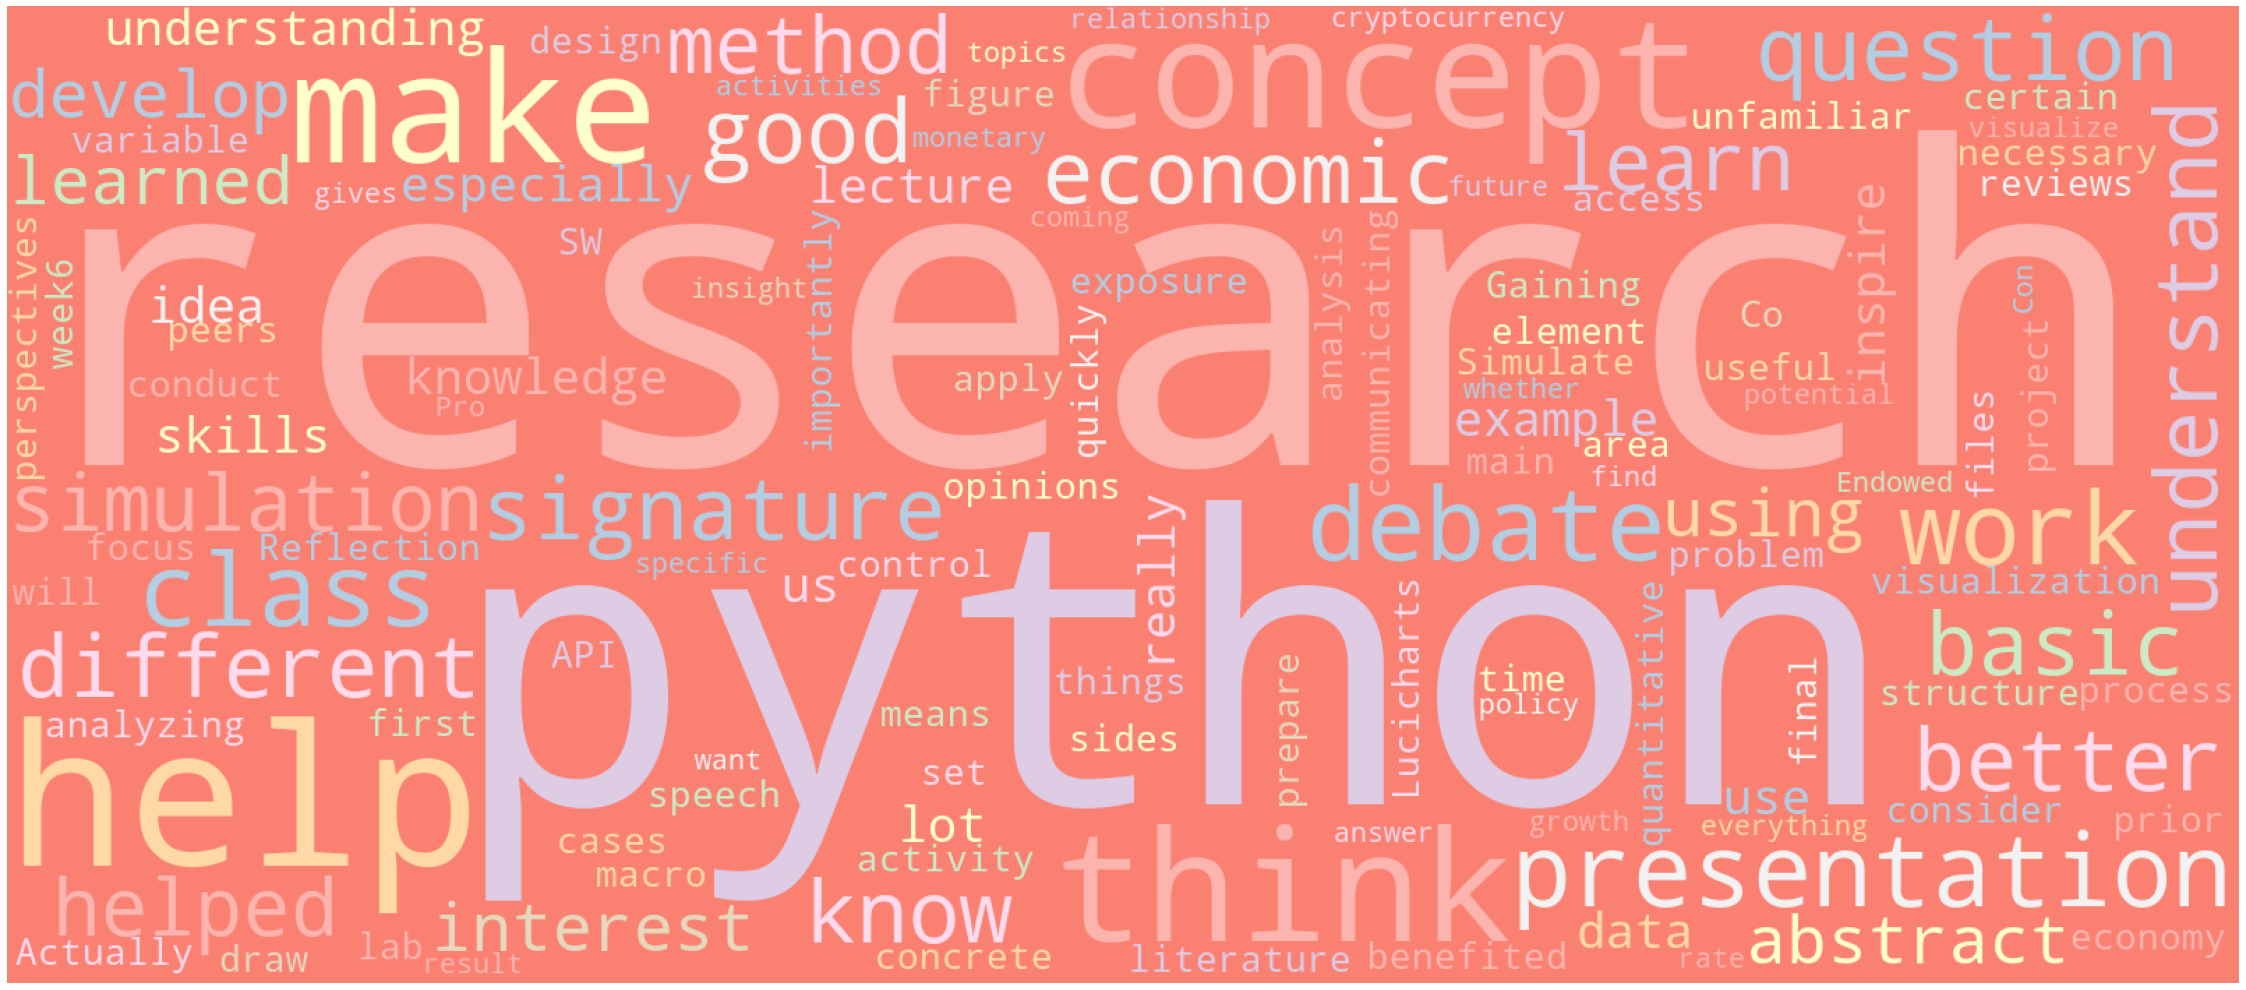

In [86]:
# Import package
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
wordcloud = WordCloud(width = 1600, height = 700, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(response)
# Plot
plot_cloud(wordcloud)

In [87]:
# Save image
wordcloud.to_file("wordcloud_light.png")

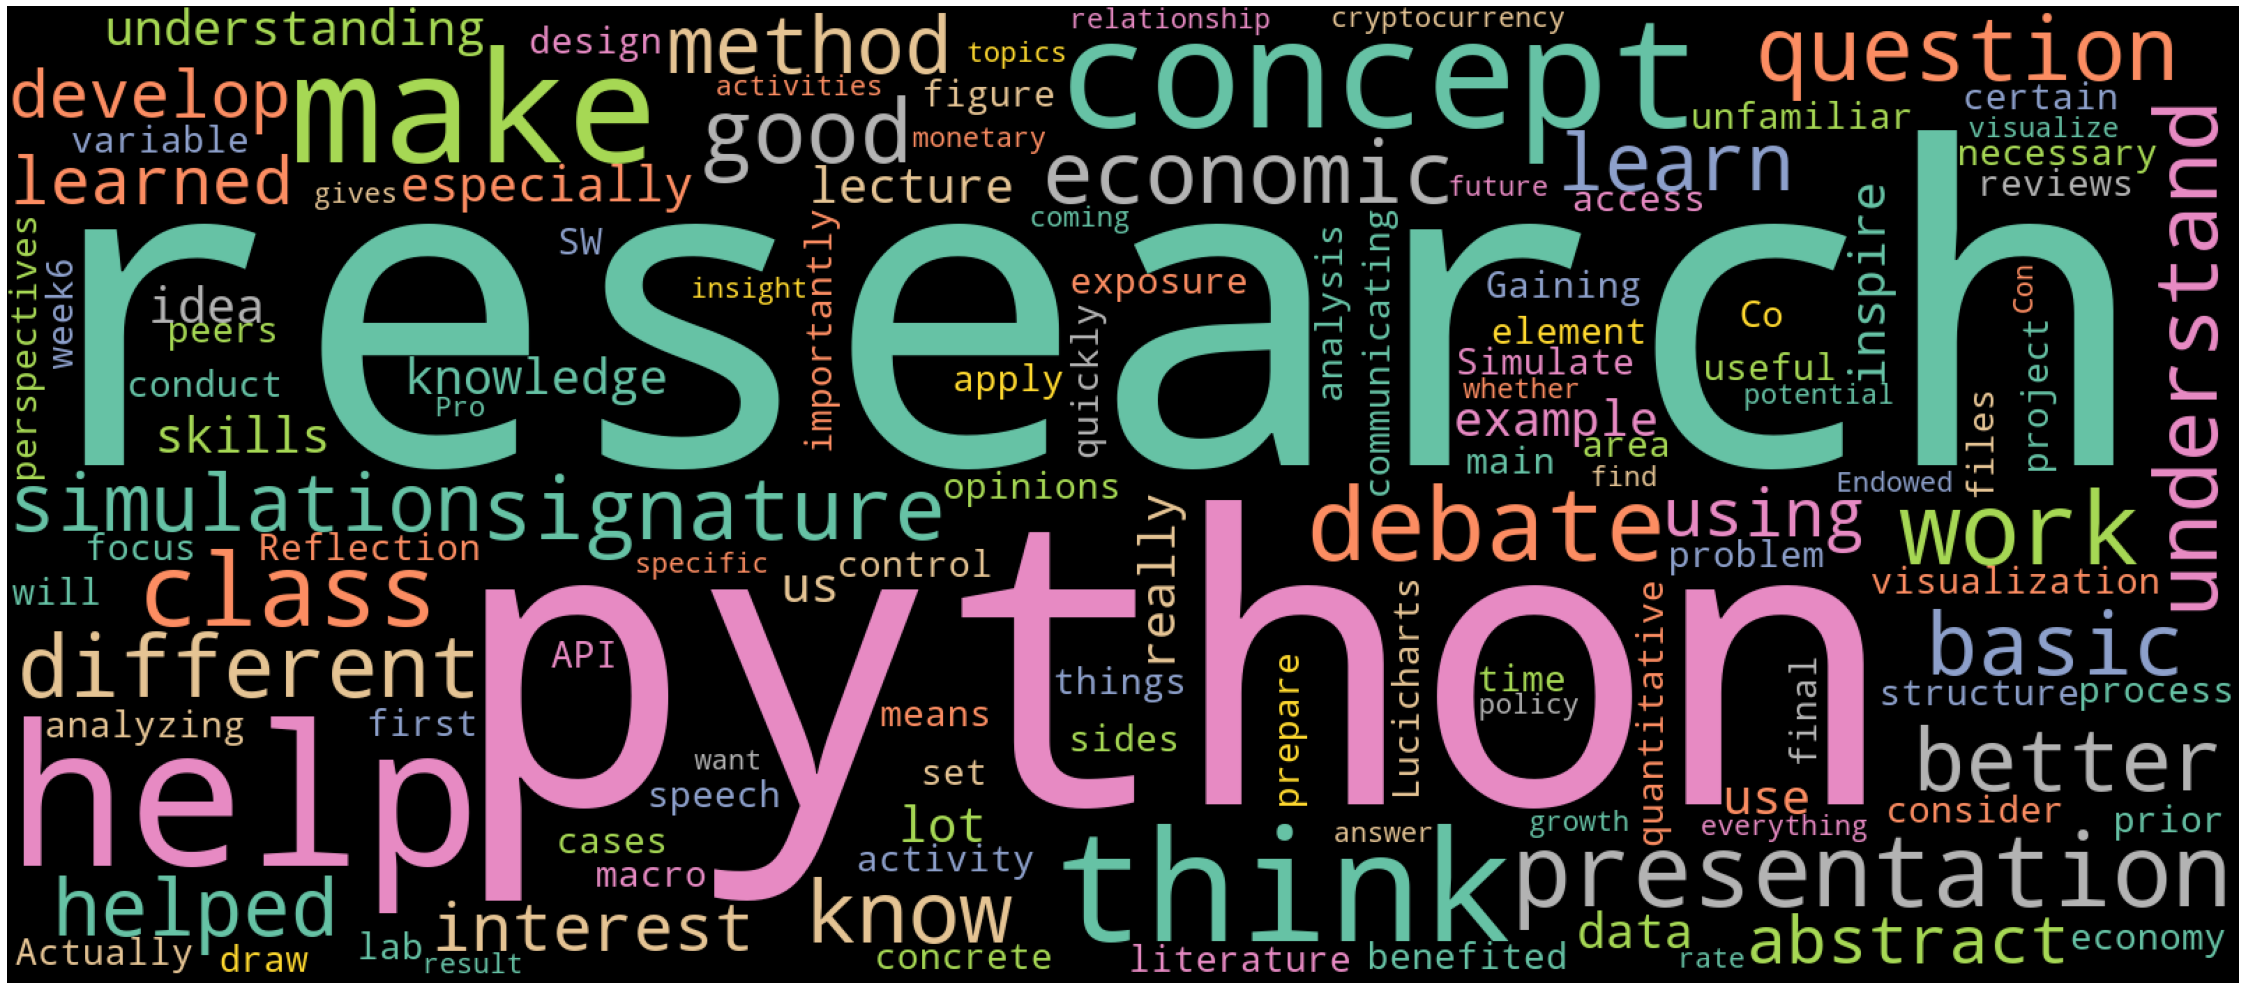

In [88]:
# Generate wordcloud
wordcloud = WordCloud(width = 1600, height = 700, random_state=1, background_color='black', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(response)
# Plot
plot_cloud(wordcloud)

In [89]:
# Save image
wordcloud.to_file("wordcloud_dark.png")